<h1>K-Mean Clustering </h1>

<h2>K-Mean Algorithm </h2>
<p>The Κ-means clustering algorithm uses iterative method to group data into K clusters.

<p>Algorithm repeats below steps till centroids keep changing for the data points and stop it when there is no change hanppening in assigned centorids. 

<b>Step1: Choose K and pick initial centroids</b>
  <p> Starts with K initial centroids, which can either be randomly generated or randomly selected from the data points. 


<b>Step2: Data Assignment</b> 
    <p>Group/cluster all the data points by assigning either of K centroid based on distance normally Euclidean (L2 Norm).
    

<b>Step3: Update New Centroid</b>
    <p>For each K centroid, Take average/mean of all data points assigned to it and update it as new Centorid for Kth Cluster.
    
    
    

<P><h2>Distance Functions (Continuous Data) </h2>
    <p>Ecludian Distance $=  \displaystyle \sqrt{\sum _{i=1}^n (X_i- Y_i)^2}$
      <p>Manhattan Distance$ =  \displaystyle \sum _{i=1}^n \left|X_i- Y_i\right|$
  <p>Minikowski Distance$ =  \displaystyle \left[\sum _{i=1}^n \left|X_i- Y_i\right|^q\right]^{\frac{-1}{q}}$
  
  <P><h2>Distance Function (Categorical Data) </h2>
     <p>Hamming Distance$ =  \displaystyle \sum _{i=1}^n \left|X_i- Y_i\right|$ 
       <p>   $\hspace{20mm}X = Y \hspace{10mm} then \hspace{10mm}  D = 0 $
      <p>    $\hspace{20mm}X \neq Y \hspace{10mm} then \hspace{10mm} D = 1$
  
  <p><h2>Standardize/ Normalize Data</h2>
Calculating distance measures directly from the training set values could be biased in the case where variables have different measurement scales or there is a mixture of numerical and categorical variables. For example, if one variable is based on annual income in dollars, and the other is based on age in years then income will have a much higher influence on the distance calculated. One solution is to Normalize the training set using Min-Max or Mean-Std.Dev method.
 
  <p> Standardization
 <p>$X =  \displaystyle \frac{X-X_{min}}{X_{max}-X_{min}}$
  <p> Normalization
 <p>$X =  \displaystyle \frac{X-\mu}{\sigma}$   where  $\mu$ is mean and $\sigma$ is standard deviation
  


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

<H1>Read Data from CSV

In [2]:
dfTrain = pd.read_csv('../input/UnclusteredDS/UnclusteredData.csv')   #Training Dataset
dfTrain.head()

,X1,X2
0,1.84208,4.60757
1,5.65858,4.79996
2,6.35258,3.29085
3,2.90402,4.61220
4,3.23198,4.93989


<h5> Visualize Data

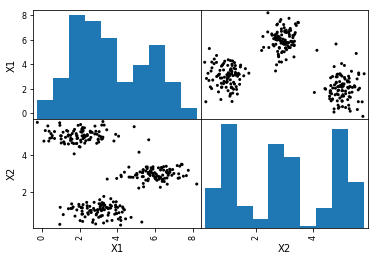

In [3]:
pd.plotting.scatter_matrix(dfTrain, alpha=1, diagonal='hist',color='k')
plt.show()

<h2>Extract Input Feature to <b>X </b>and Label <b>Y=0 (index of centroid)</b></h2>
<h5>X=(X1 &amp; X2 in DS) and Y(Class in DS)   

In [4]:
def extractFeatures(df):
    df_Features=df.iloc[:,0:2]
    X=df_Features.values
    Y=np.zeros((len(df_Features),1))       #All are assigned to K= 1 cluster
    return X,Y

In [5]:
X,Y=extractFeatures(dfTrain)

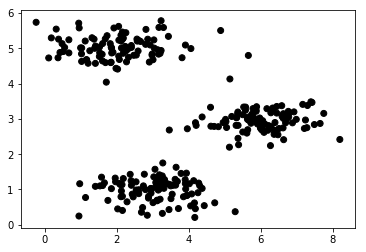

In [6]:
cmap = ListedColormap(['black','magenta', 'red','green','orange']) 
plt.scatter(dfTrain.loc[:,['X1']].values,dfTrain.loc[:,['X2']].values, c=Y,cmap=cmap,marker="o")
plt.show()

<h1> K-Mean Algorithm

<b>Step1: Choose K and pick initial centroids</b>

In [7]:
def initCentroids(X,K):
    rand_indices = np.random.permutation(X.shape[0])
    init_centroids = X[rand_indices[:K],:]
    return init_centroids

<b>Step2: Assign Centroid to each data point</b> 

In [8]:
def assignCentroids(X,centroids):    
    K=centroids.shape[0]
    #Assign index to each training set
    Y=np.zeros((X.shape[0],1))
    for i in range(len(X[:,0:1])): 
        Prev_Distance=np.linalg.norm( X[i,:]-centroids[0,:])
        for j in range(1,K):
            Current_Distance=np.linalg.norm( X[i,:]-centroids[j,:])
            if(Current_Distance<=Prev_Distance):
                Y[i]=j
                Prev_Distance=Current_Distance
    return Y

<b>Step3: Update New Centroids</b>

In [9]:
def updateNewCentroids(X,Y,K):    
    centroids = np.zeros((K,X.shape[1]))
    for j in range(0,K):
        sumC=np.zeros((1,X.shape[1]))
        countC=0
        for i in range(len(X[:,0:1])): 
            if (Y[i]==j):
                sumC=sumC+X[i,:]
                countC=countC+1
        if (countC!=0):
            centroids[j,:]=(1/countC)*sumC

    return centroids

<b>Run Above Methods(Steps) iteratively

In [10]:
K=5
init_centroids = initCentroids(X,K)

centroids=init_centroids    #start with Initial Centroid
centroidsHistory=[init_centroids]
while True:
    Y = assignCentroids(X,centroids)      #Assignment Step
    newCentroids =updateNewCentroids(X,Y,K)   #Update New Centroids Step
    if ((newCentroids==centroids).all()):
        break
    else:
        centroids=newCentroids
        centroidsHistory.append(newCentroids)



<b>Plot the Graph

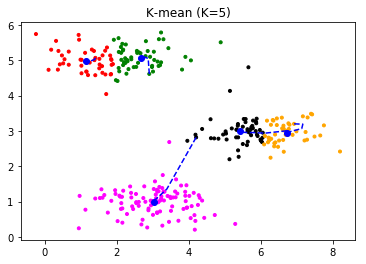

In [11]:
plt.scatter(X[:,0:1],X[:,1:2],c=Y,cmap=cmap,marker=".")
#plot Centroid History with line how centorids are moving
for i in range(K):
    histCentroids=np.array( centroidsHistory)[:,i,:]
    plt.plot(histCentroids[:,0:1],histCentroids[:,1:2],color='b',linestyle='dashed')
    
#Final Centroid
plt.scatter(centroids[:,0:1],centroids[:,1:2],color='b',marker="o",edgecolor='b')
plt.title('K-mean (K='+str(K)+')')
plt.show()


<h1>Choosing Correct K (Elbow Method)</h1>
<p>
compare  different values of K for the mean distance between data points and their cluster centroid.
    Plot mean distance to the centroid as a function of K and choose K from the "elbow point," where the rate of decrease sharply shifts.

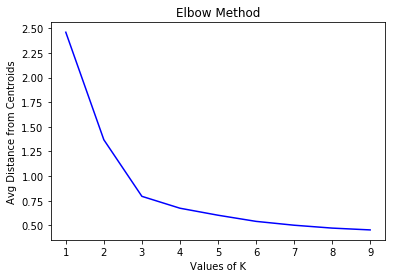

In [12]:
maxK=10
meanvalues=np.zeros((maxK))
for K in (range(1,maxK)):
    rand_indices = np.random.permutation(X.shape[0])
    init_centroids = X[rand_indices[:K],:]
    centroids=init_centroids    #start with Initial Centroid
    while True:
        Y = assignCentroids(X,centroids)      #Assignment Step
        newCentroids =updateNewCentroids(X,Y,K)   #Update New Centroids Step
        if ((newCentroids==centroids).all()):
            break
        else:
            centroids=newCentroids
    ##############
    meanvalues[K]=0
    for i in range(K):
        distanceValues=np.linalg.norm(X[np.where(Y==i)[0]]-centroids[i,:],axis=1)
        meanvalues[K]=meanvalues[K]+np.mean(distanceValues)/K
 
plt.plot(range(1,maxK),meanvalues[1:maxK],color='b')     #Ignoring K=0 
plt.ylabel('Avg Distance from Centroids')
plt.xlabel('Values of K')
plt.title("Elbow Method")
plt.show()